# Exploratory Data Analysis

# Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read data

In [2]:
data = pd.read_csv("Clean_data.csv")

In [3]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,female,80,0,1,never,25.19,6.6,140,0
1,female,54,0,0,no info,27.32,6.6,80,0
2,male,28,0,0,never,27.32,5.7,158,0
3,female,36,0,0,current,23.45,5.0,155,0
4,male,76,1,1,current,20.14,4.8,155,0


## Split data to numerical and categorical analysis

In [4]:
numerical_df = data.select_dtypes(exclude = "object")
catgorical_df = data.select_dtypes(include = "object")

In [5]:
numerical_df.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0


In [6]:
catgorical_df.head(2)

,gender,smoking_history
0,female,never
1,female,no info


## Univariate data analysis

## Numerical features

In [7]:
numerical_df.head(2)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80,0,1,25.19,6.6,140,0
1,54,0,0,27.32,6.6,80,0


In [8]:
def create_box_histplot(data_frame,columns= [] ,hist = False, box = False):
    # make a copy of dataframe
    df = data_frame.copy()

    # number of columns for subplot is same as number of features
    ncolumns = len(columns)
    # Set number of columns and dynamic figure size
    subplot_width = 5  # Set desired width per subplot
    subplot_height = 5  # Set desired height per subplot
    figsize = (ncolumns * subplot_width, subplot_height)     
    fig, axes = plt.subplots(nrows=1, ncols=ncolumns,figsize = figsize)
    
    for index, feature in enumerate(columns):
        if hist == True:
            sns.histplot(data = df[feature], ax = axes[index])
        if box == True:
            sns.boxplot(data = df[feature], ax=axes[index])
    plt.tight_layout()
    plt.show();

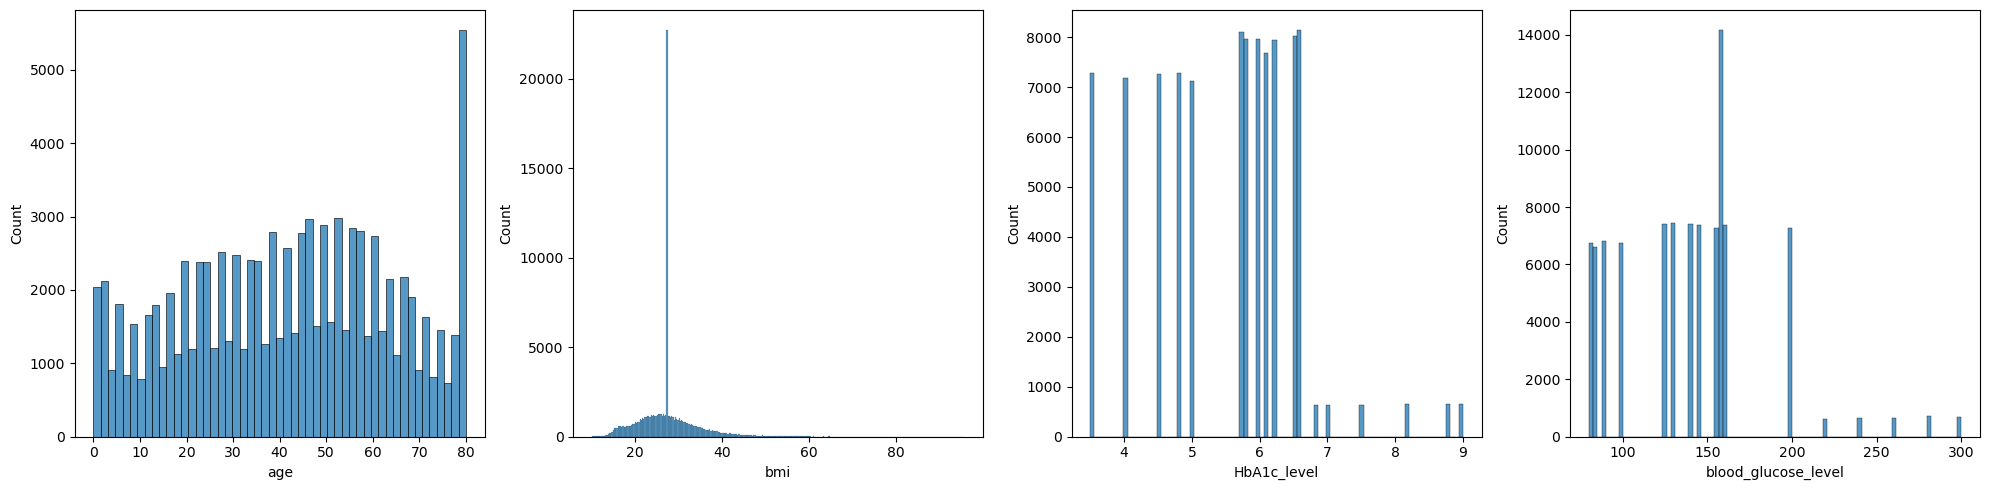

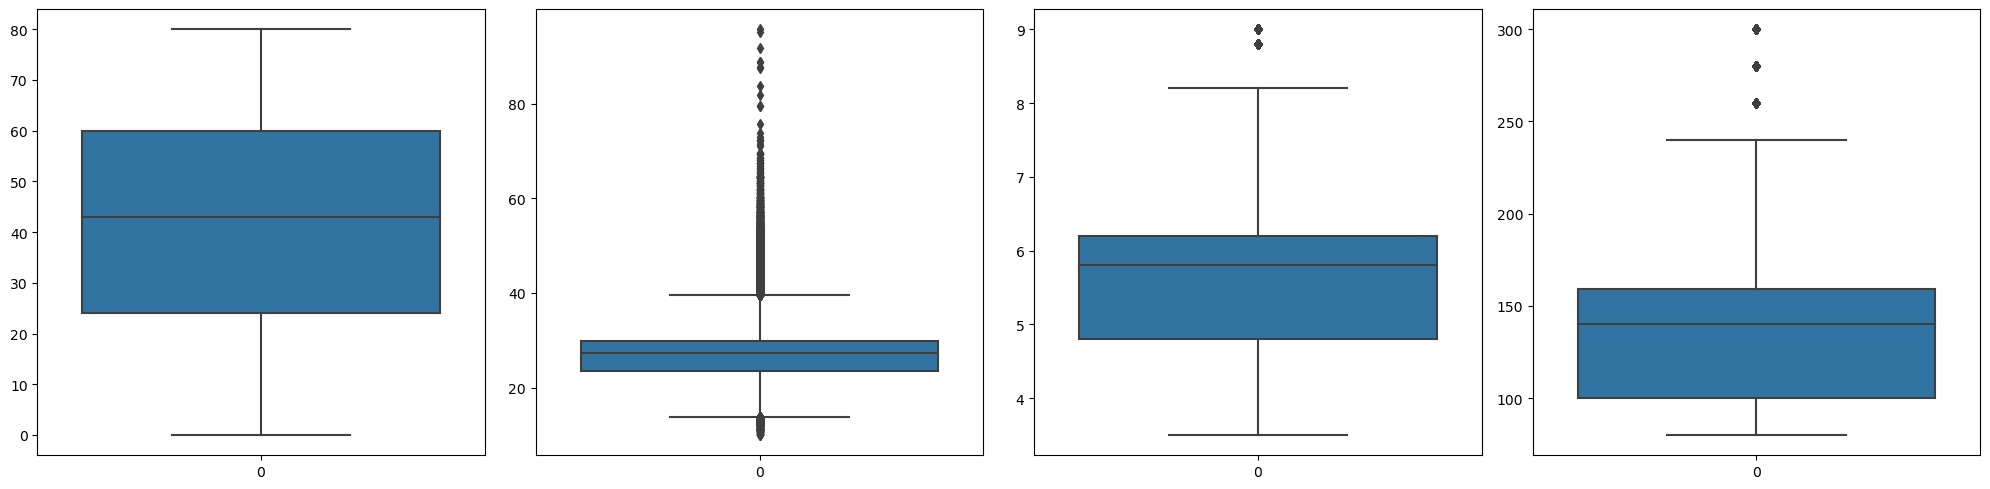

In [9]:
create_box_histplot(data_frame=numerical_df, columns=["age", "bmi", "HbA1c_level", "blood_glucose_level"], hist = True)
create_box_histplot(data_frame=numerical_df,columns=["age", "bmi", "HbA1c_level", "blood_glucose_level"], box = True)

1. Age Distribution
The age distribution across our dataset appears relatively uniform with individuals spanning a wide age range. However, there is a notable spike at age 80. This anomaly could indicate a potential data entry issue, such as many individuals being recorded with a default age of 80, or it could reflect a genuine trend where a significant number of our population falls into the elderly category.
- Action: We recommend further investigation to determine whether this spike is a data anomally or a reflection of our target demographic. If it is a data anomally, appropriate data cleaning steps should be taken.

2. BMI Distribution
The distribution of BMI shows an unusual and sharp spike around a value of 21. This concentration might suggest that many individuals have their BMI recorded at this specific value, potentially due to rounding or the use of a default value. Additionally, the overall distribution is right-skewed, indicating that while most individuals have a BMI within a healthy range, there are significant outliers with much higher values.
- Action: We recommend reviewing the data collection and recording processes to ensure accuracy. Additionally, outlier management strategies should be considered to prevent these extreme values from distorting our analyses.

3. HbA1c Level Distribution
The distribution of HbA1c levels reveals distinct and sharp peaks around values such as 5.5, 6, and 7. This pattern suggests that these values could be commonly used thresholds in clinical practice. While this might be expected, the sharpness of these peaks raises questions about the granularity of the data—potentially indicating that the data is being binned or rounded rather than recorded precisely.
- Action: We recommend assessing the data recording practices to understand whether this rounding is intentional or a result of data processing. More granular data might provide deeper insights into health outcomes.

4. Blood Glucose Level Distribution
The blood glucose level distribution shows similar characteristics to the HbA1c levels, with noticeable peaks at common clinical thresholds such as 100, 150, and 200. The distribution is right-skewed, with a long tail indicating that while most individuals have normal glucose levels, a significant minority exhibit much higher levels.
- Action: We propose a closer examination of these peaks to determine if they correspond to clinical decision thresholds or if there are underlying data quality issues. Addressing skewness may also involve transforming the data for more accurate predictive modeling.

In [10]:
# write a function to plot pie chart for binary numerical features

def plot_pie(data, columns = []):
    df = data.copy()
    
    # number of columns for subplot is same as number of features
    ncolumns = len(columns)
    
    # Set number of columns and dynamic figure size
    subplot_width = 5  # Set desired width per subplot
    subplot_height = 5  # Set desired height per subplot
    
    # calculate appropriate size for subplot
    figsize = (ncolumns * subplot_width, subplot_height)     
    fig, axes = plt.subplots(nrows=1, ncols=ncolumns,figsize = figsize)
    
    # flatten axes for iteration
    axes = axes.flatten()
    
    # If there's only one feature, 'axes' will not be an array, so handle this case
    if ncolumns == 1:
        axes = [axes]
        
    for index, feature in enumerate(columns):
        # check if feature exist on the specified dataframe
        if feature in df.columns:
            
            # convert data into string if numerical
            df[feature] = df[feature].astype("object")
            values = df[feature].value_counts()
            axes[index].pie(values, labels=values.index, autopct='%1.1f%%', startangle=140)
            axes[index].set_title(f'Distribution of {feature}')
            
        # raise warning if feature does not exist on specified data
        else:
            print(f"Feature '{feature}' not found in the dataset.")

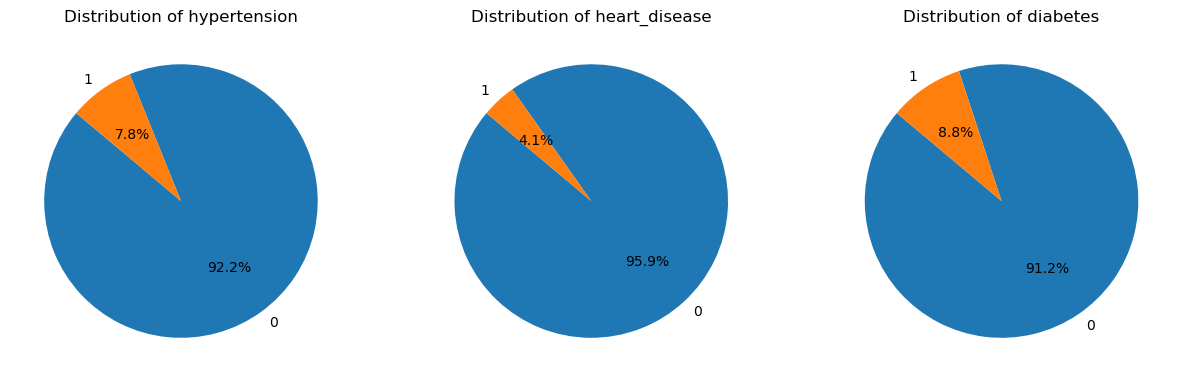

In [11]:
plot_pie(data, ["hypertension", "heart_disease", "diabetes"])

The pie charts provided illustrate the distribution of three binary health conditions within the dataset: hypertension, heart disease, and diabetes. Each chart shows the proportion of individuals with (label "1") and without (label "0") these conditions.

1. Hypertension Distribution
    - Distribution: 92.2% of the population does not have hypertension (label "0"), while 7.8% have hypertension (label "1").
    - Implication: There is a significant class imbalance, with a large majority of the population being free from hypertension.

2. Heart Disease Distribution
    - Distribution: 95.9% of the population does not have heart disease (label "0"), while only 4.1% have heart disease (label "1").
    - Implication: The class imbalance is even more pronounced here, with a very small proportion of the population having heart disease.

3. Diabetes Distribution
    - Distribution: 91.2% of the population does not have diabetes (label "0"), while 8.8% have diabetes (label "1").
    - Implication: Similar to hypertension, there is a notable class imbalance, with a majority of the population being non-diabetic.

**Possible impact of imbalance on ML model:**
1. Reduced Feature Importance:
- The model might downplay the importance of hypertension and heart disease as predictors, simply because these features are imbalanced. This could lead to underutilization of these features, which may be critical in predicting diabetes.

2. Model Overfitting or Underfitting:
- The imbalance in the independent features could lead to the model overfitting to the majority class of these features (predicting no hypertension or no heart disease) without learning the true relationship between these features and the target variable (diabetes). This might result in a model that is not generalizable to new data.

3. Limited Generalization:
- If the model relies heavily on these imbalanced features, it might struggle to generalize when encountering cases where these conditions (hypertension, heart disease) are more balanced or when the minority classes are more prevalent.

**Strategies to Mitigate the Impact:**
1. Resampling the Target Feature:
- Apply oversampling of the minority class (those with diabetes) or undersampling of the majority class to create a more balanced dataset, improving the model’s ability to detect diabetes cases.

2. Use of Class Weights:
- Introduce class weights in the model’s loss function to penalize misclassification of the minority class more heavily, ensuring that the model pays more attention to identifying diabetes cases.

3. Feature Engineering:
- Enhance the features by combining them or creating new derived features that capture more balanced and informative patterns related to diabetes.
4. Evaluation Metrics:
- Use evaluation metrics like F1-score, precision, recall, and the area under the precision-recall curve (AUC-PR) that are better suited for imbalanced data instead of relying on accuracy alone.

## Bi-variate analysis for continuous numerical data

<Axes: xlabel='age', ylabel='bmi'>

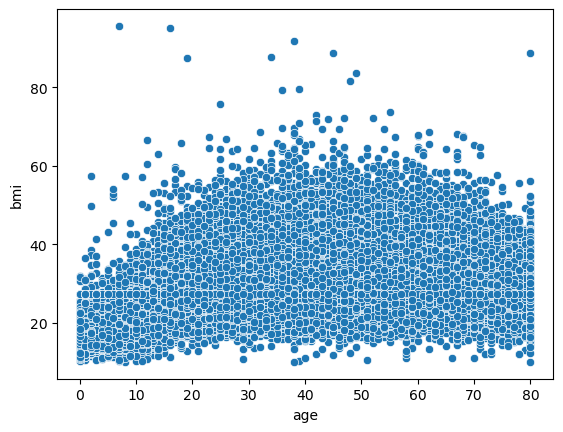

In [16]:
# Create scatter plot of Age against BMI
sns.scatterplot(x= data["age"], y = data["bmi"])

**Observations**
- BMI values are widely distributed across the age range, with most points clustered between BMI 20 and 60.
- BMI values slightly increase with age up to around 50 years, after which they appear to stabilize or slightly decrease.
- Outliers exist, particularly with BMI values exceeding 60, spread across various age groups.
- BMI variation is high across all ages, showing that individuals of the same age can have widely different BMI values.

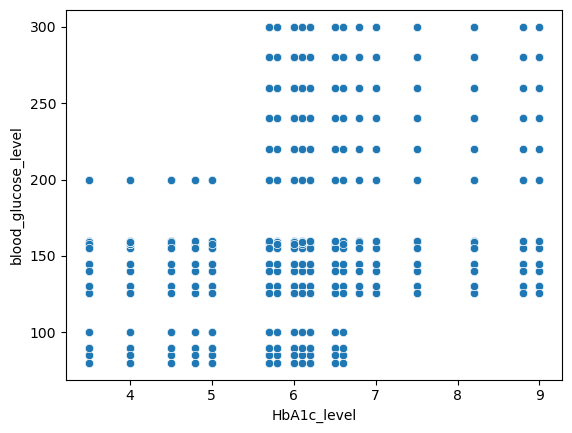

In [38]:
# Create scatter plot of heamoglobin level against blood glucose level
sns.scatterplot(x= data["HbA1c_level"], y = data["blood_glucose_level"]);

**Observation**
- The spread of data points also indicates that for the same HbA1c level, there can be a wide range of blood glucose levels, showing variability in the data,

# Bi variate analysis for Binary numerical columns

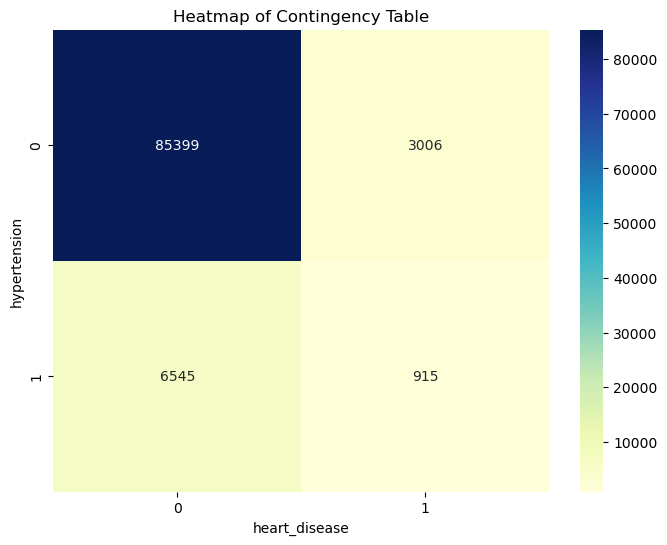

In [21]:
# Generate Contingency Table
contingency_table = pd.crosstab(data['hypertension'], data['heart_disease'])

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Contingency Table')
plt.ylabel('hypertension')
plt.xlabel('heart_disease')
plt.show()

**Observations**
- Most individuals in the dataset do not have hypertension and do not have heart disease.
- The number of individuals with heart disease is higher among those without hypertension (3,006) than those with hypertension (915).

# Multivariate EDA for Numerical features

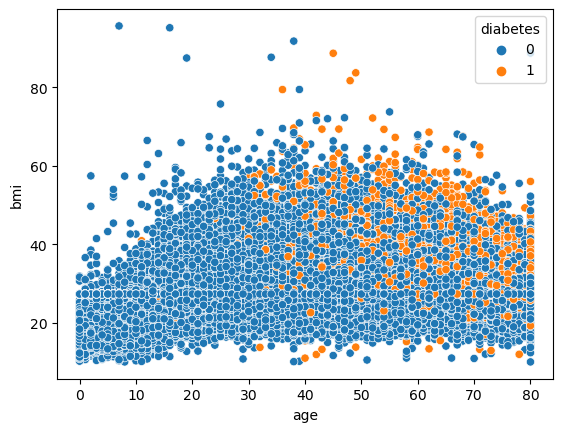

In [24]:
# Create scatter plot of Age, BMI and diabetes
sns.scatterplot(x= data["age"], y = data["bmi"], hue = data["diabetes"]);

**Observations**
- Age and BMI Interaction: The plot suggests that the interaction between age and BMI might be important. For instance, a high BMI might be a stronger predictor of diabetes in older individuals compared to younger ones.
- Consider creating interaction terms (e.g., Age*BMI) to capture combined effects.
- Use models that handle non-linear relationships well (e.g., Decision Trees, Random Forests, Gradient Boosting Machines).
- Consider creating age groups (e.g., <40, 40-70, >70) to capture non-linear relationship betwen age and diabetes.

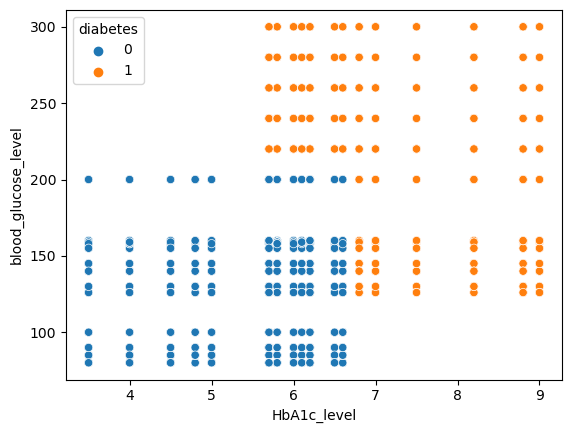

In [26]:
# Create scatter plot of heamoglobin level, blood glucose level against diabetes
sns.scatterplot(x= data["HbA1c_level"], y = data["blood_glucose_level"], hue = data["diabetes"]);

**Observation**
- Both HbA1c level and blood glucose level are critical features for predicting diabetes. Their strong association with diabetes suggests they should be prominently included in the model.
- Consider adding a new feature to your dataset that flags whether the HbA1c level is above or below 6. This binary feature can provide a strong signal to the model, allowing it to implicitly learn the threshold without explicitly setting one.
- Consider Converting the continuous HbA1c levels into bins or categories (e.g., <6, 6-7, >7). 

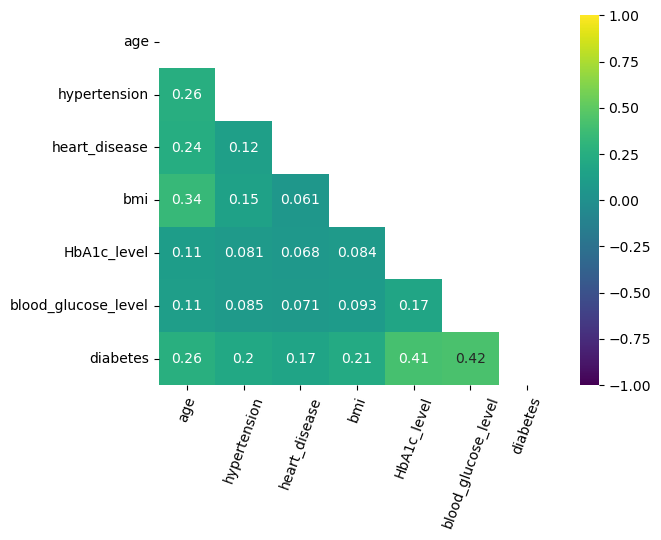

In [37]:
mask = np.triu(np.ones_like(numerical_df.corr(), dtype = bool))
sns.heatmap(data = numerical_df.corr(), cmap = "viridis", vmax=1, vmin=-1, annot = True, mask = mask)
plt.xticks(rotation = 70);

**Observations**
- HbA1c Level (0.41): Strong positive correlation with diabetes.
- Blood Glucose Level (0.42): Strong positive correlation with diabetes.
- BMI (0.21): Moderate positive correlation with diabetes.
- Age (0.26): Moderate positive correlation with diabetes.
- Hypertension (0.20): Weak to moderate positive correlation with diabetes.
- Heart Disease (0.17): Weak positive correlation with diabetes.

# Categorical Features

In [39]:
catgorical_df.head()

,gender,smoking_history
0,female,never
1,female,no info
2,male,never
3,female,current
4,male,current


## Univariate analysis

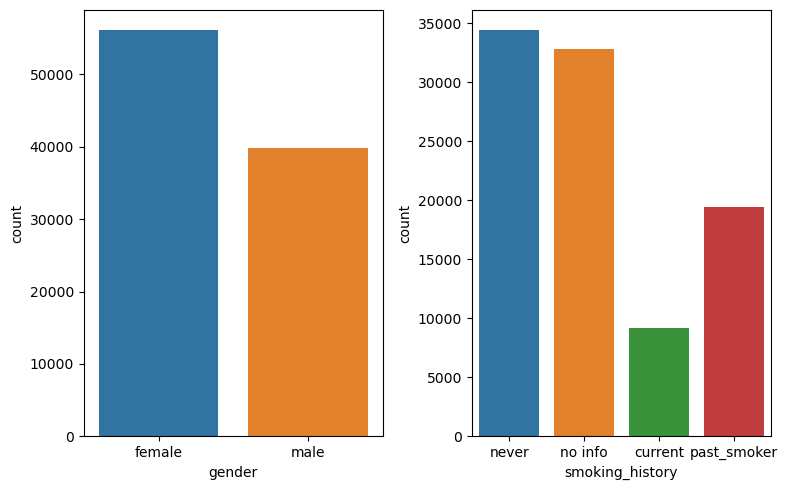

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8,5))
sns.countplot(data = catgorical_df, x = "gender", ax =axes[0])
sns.countplot(data = catgorical_df, x = "smoking_history", ax =axes[1]);
plt.tight_layout()

**Gender Distribution:**
- More females (around 55,000) than males (around 40,000) in the dataset.
- There is a noticeable gender imbalance that could affect analysis.

**Smoking History Distribution:**
- The largest group is individuals who have never smoked, followed closely by those with missing information ("no info").
- The fewest individuals are current smokers, with past smokers being in the middle.
- Significant missing data ("no info") in smoking history needs to be addressed for accurate modeling.

## Bi-variate analysis for categorical features

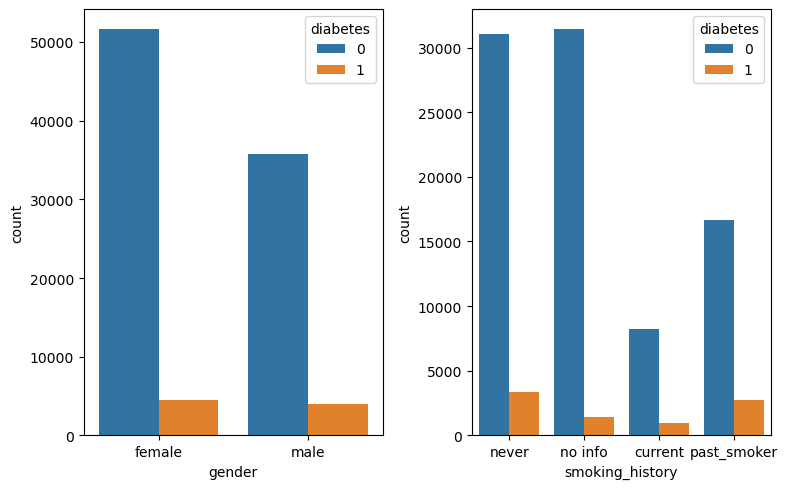

In [47]:
#check distribution of target feature across all category

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (8,5))
sns.countplot(data = catgorical_df, x = "gender", ax =axes[0], hue=data["diabetes"])
sns.countplot(data = catgorical_df, x = "smoking_history", ax =axes[1], hue=data["diabetes"]);
plt.tight_layout()